In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df=pd.read_csv("Downloads/framingham.csv")

In [4]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# EDA

In [5]:
df.shape

(4240, 16)

In [6]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Check for missing values and impute these values.

In [8]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

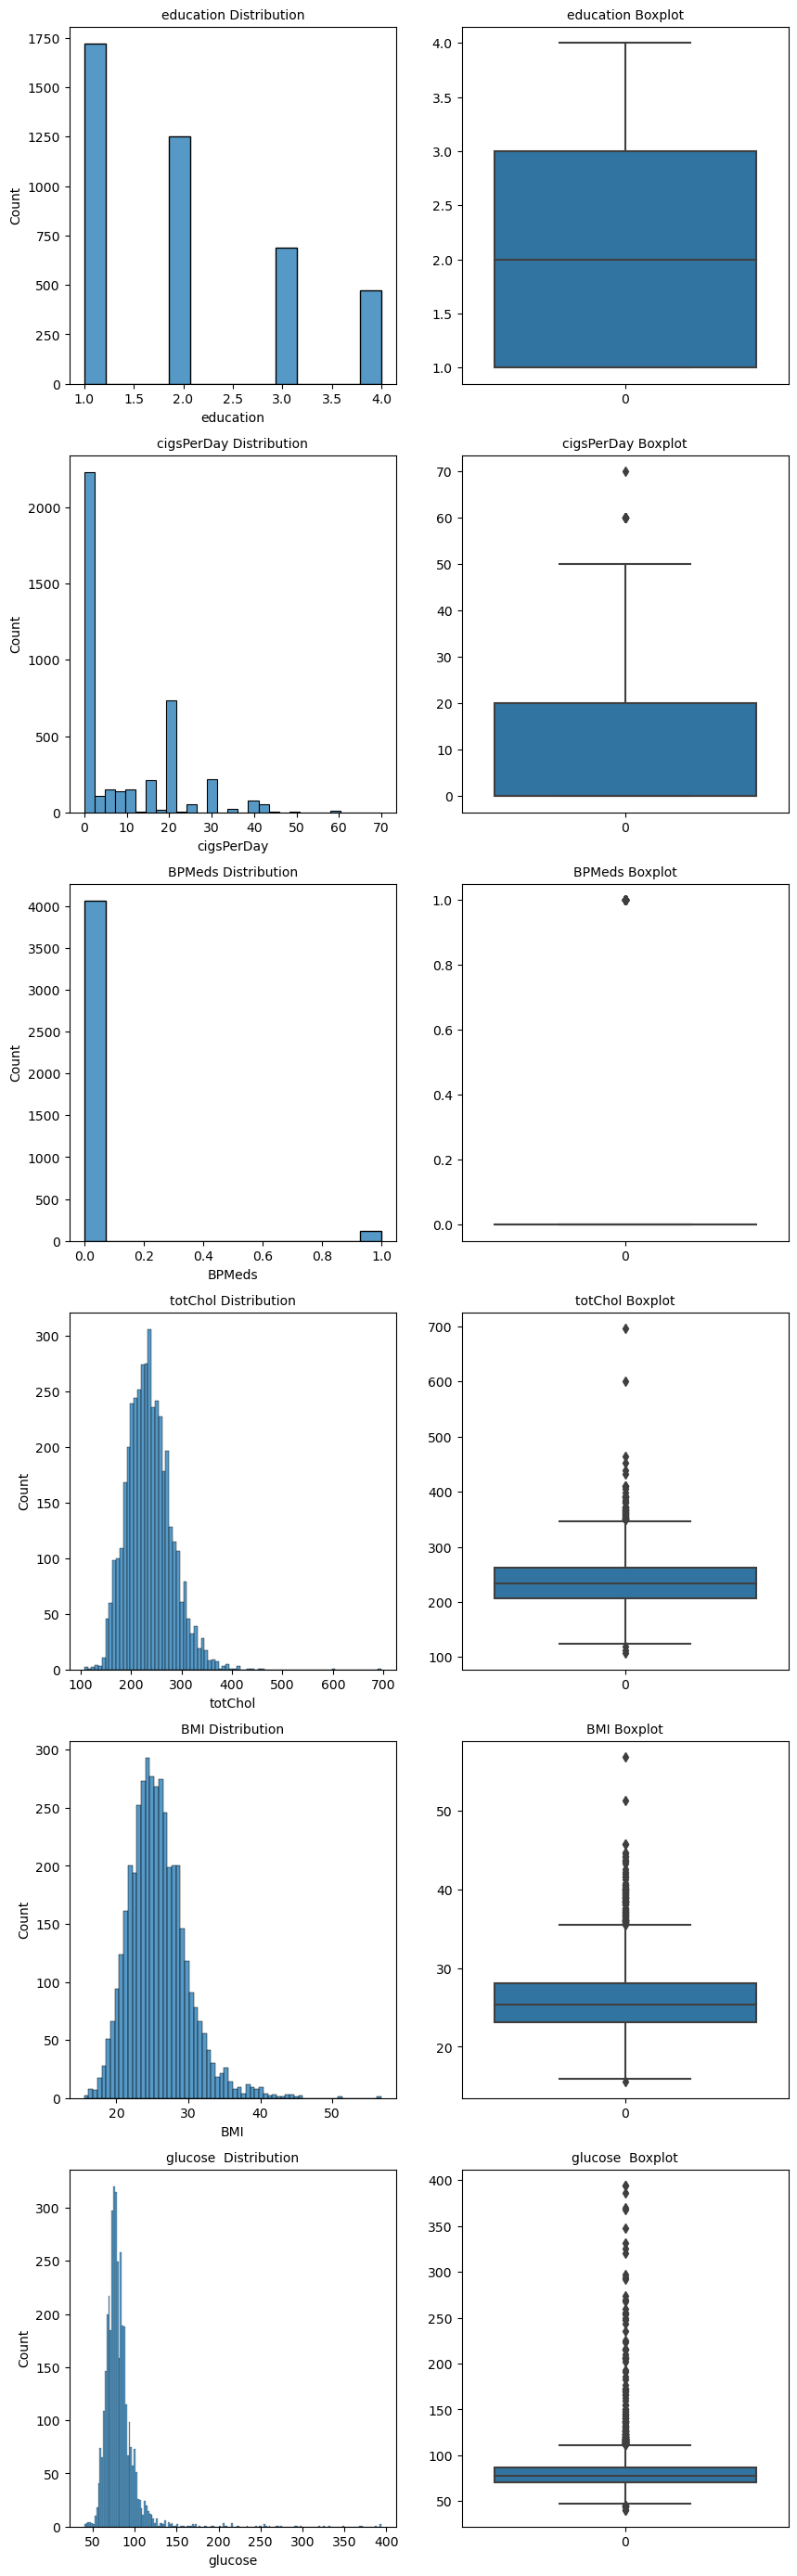

In [9]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10,35)

a = sns.histplot(df['education'] , ax=axes[0][0])
a.set_title("education Distribution",fontsize=10)

a = sns.boxplot(df['education'] , orient = "v" , ax=axes[0][1])
a.set_title("education Boxplot",fontsize=10)

a = sns.histplot(df['cigsPerDay'] , ax=axes[1][0])
a.set_title("cigsPerDay Distribution",fontsize=10)

a = sns.boxplot(df['cigsPerDay'] , orient = "v" , ax=axes[1][1])
a.set_title("cigsPerDay Boxplot",fontsize=10)


a = sns.histplot(df['BPMeds'] , ax=axes[2][0])
a.set_title("BPMeds Distribution",fontsize=10)

a = sns.boxplot(df['BPMeds'] , orient = "v" , ax=axes[2][1])
a.set_title("BPMeds Boxplot",fontsize=10)


a = sns.histplot(df['totChol'] , ax=axes[3][0])
a.set_title("totChol Distribution",fontsize=10)

a = sns.boxplot(df['totChol'] , orient = "v" , ax=axes[3][1])
a.set_title("totChol Boxplot",fontsize=10)

a = sns.histplot(df['BMI'] , ax=axes[4][0])
a.set_title("BMI Distribution",fontsize=10)

a = sns.boxplot(df['BMI'] , orient = "v" , ax=axes[4][1])
a.set_title("BMI Boxplot",fontsize=10)

a = sns.histplot(df['glucose'] , ax=axes[5][0])
a.set_title("glucose  Distribution",fontsize=10)

a = sns.boxplot(df['glucose'] , orient = "v" , ax=axes[5][1])
a.set_title("glucose  Boxplot",fontsize=10)


plt.show()


In [10]:
#"totChol","BMI","glucose" have some outliers so fill null values of these features by their meadian.

In [90]:
df["education"].fillna(df["education"].mode(),inplace=True)

In [91]:
df["cigsPerDay"].fillna(df["cigsPerDay"].mean(),inplace=True)

In [92]:
df["BPMeds"].fillna(df["BPMeds"].mode(),inplace=True)

In [93]:
df["heartRate"].fillna(df["heartRate"].mean(),inplace=True)

In [94]:
df["totChol"].fillna(df["totChol"].median(),inplace=True)

In [16]:
df["BMI"].fillna(df["BMI"].median(),inplace=True)

In [95]:
df["glucose"].fillna(df["glucose"].median(),inplace=True)

In [96]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Check the basic measures of descriptive statistics for the training data


In [97]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,8.975276,0.029615,0.005896,0.310613,0.025708,236.170047,131.915684,82.743042,25.714098,75.750915,79.450472,0.151887
std,0.495027,8.572942,1.007082,0.500024,11.760250,0.168481,0.076569,0.462799,0.158280,42.299175,20.642860,11.404757,3.787978,11.622269,11.453158,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,83.500000,52.500000,15.645000,45.500000,52.500000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,346.000000,184.500000,112.500000,35.465000,105.500000,104.500000,1.000000


# Check for outliers and treat outliers by the IQR method.

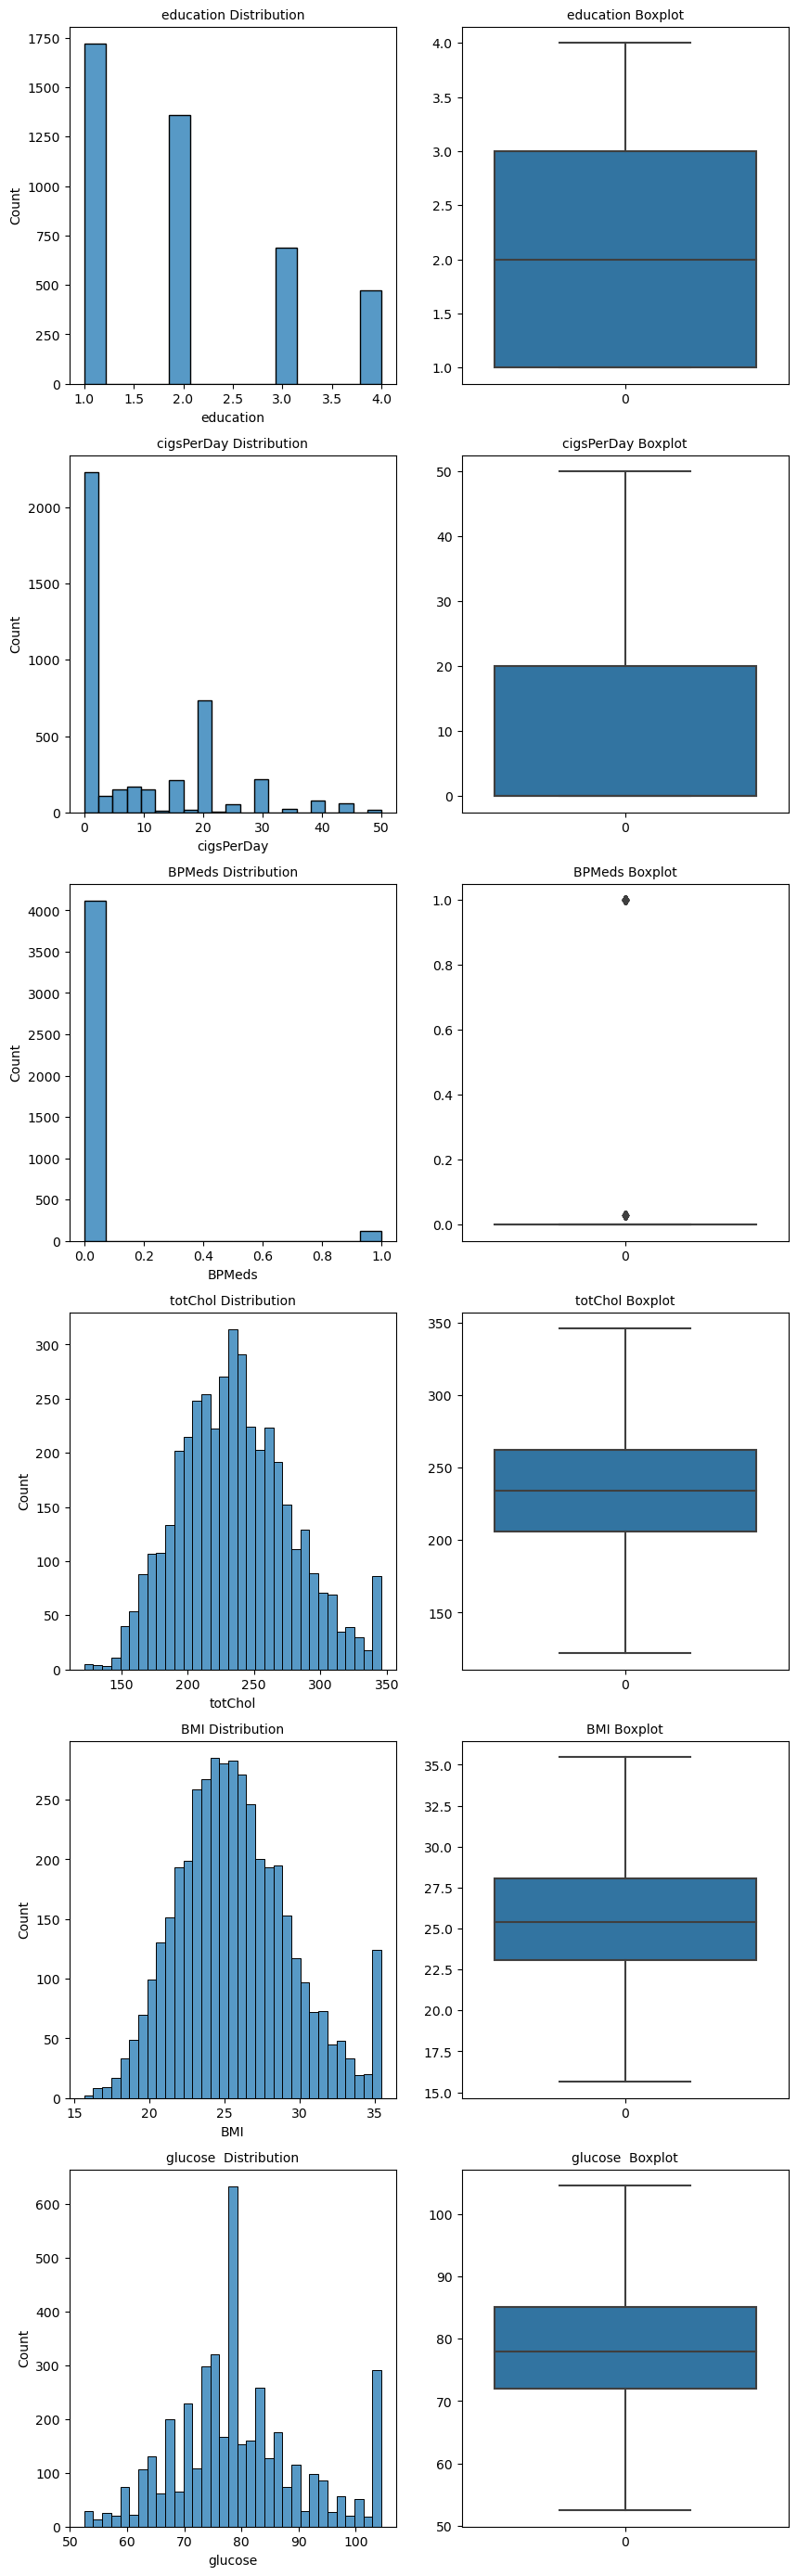

In [98]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(10,35)

a = sns.histplot(df['education'] , ax=axes[0][0])
a.set_title("education Distribution",fontsize=10)

a = sns.boxplot(df['education'] , orient = "v" , ax=axes[0][1])
a.set_title("education Boxplot",fontsize=10)

a = sns.histplot(df['cigsPerDay'] , ax=axes[1][0])
a.set_title("cigsPerDay Distribution",fontsize=10)

a = sns.boxplot(df['cigsPerDay'] , orient = "v" , ax=axes[1][1])
a.set_title("cigsPerDay Boxplot",fontsize=10)


a = sns.histplot(df['BPMeds'] , ax=axes[2][0])
a.set_title("BPMeds Distribution",fontsize=10)

a = sns.boxplot(df['BPMeds'] , orient = "v" , ax=axes[2][1])
a.set_title("BPMeds Boxplot",fontsize=10)


a = sns.histplot(df['totChol'] , ax=axes[3][0])
a.set_title("totChol Distribution",fontsize=10)

a = sns.boxplot(df['totChol'] , orient = "v" , ax=axes[3][1])
a.set_title("totChol Boxplot",fontsize=10)

a = sns.histplot(df['BMI'] , ax=axes[4][0])
a.set_title("BMI Distribution",fontsize=10)

a = sns.boxplot(df['BMI'] , orient = "v" , ax=axes[4][1])
a.set_title("BMI Boxplot",fontsize=10)

a = sns.histplot(df['glucose'] , ax=axes[5][0])
a.set_title("glucose  Distribution",fontsize=10)

a = sns.boxplot(df['glucose'] , orient = "v" , ax=axes[5][1])
a.set_title("glucose  Boxplot",fontsize=10)


plt.show()


In [99]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

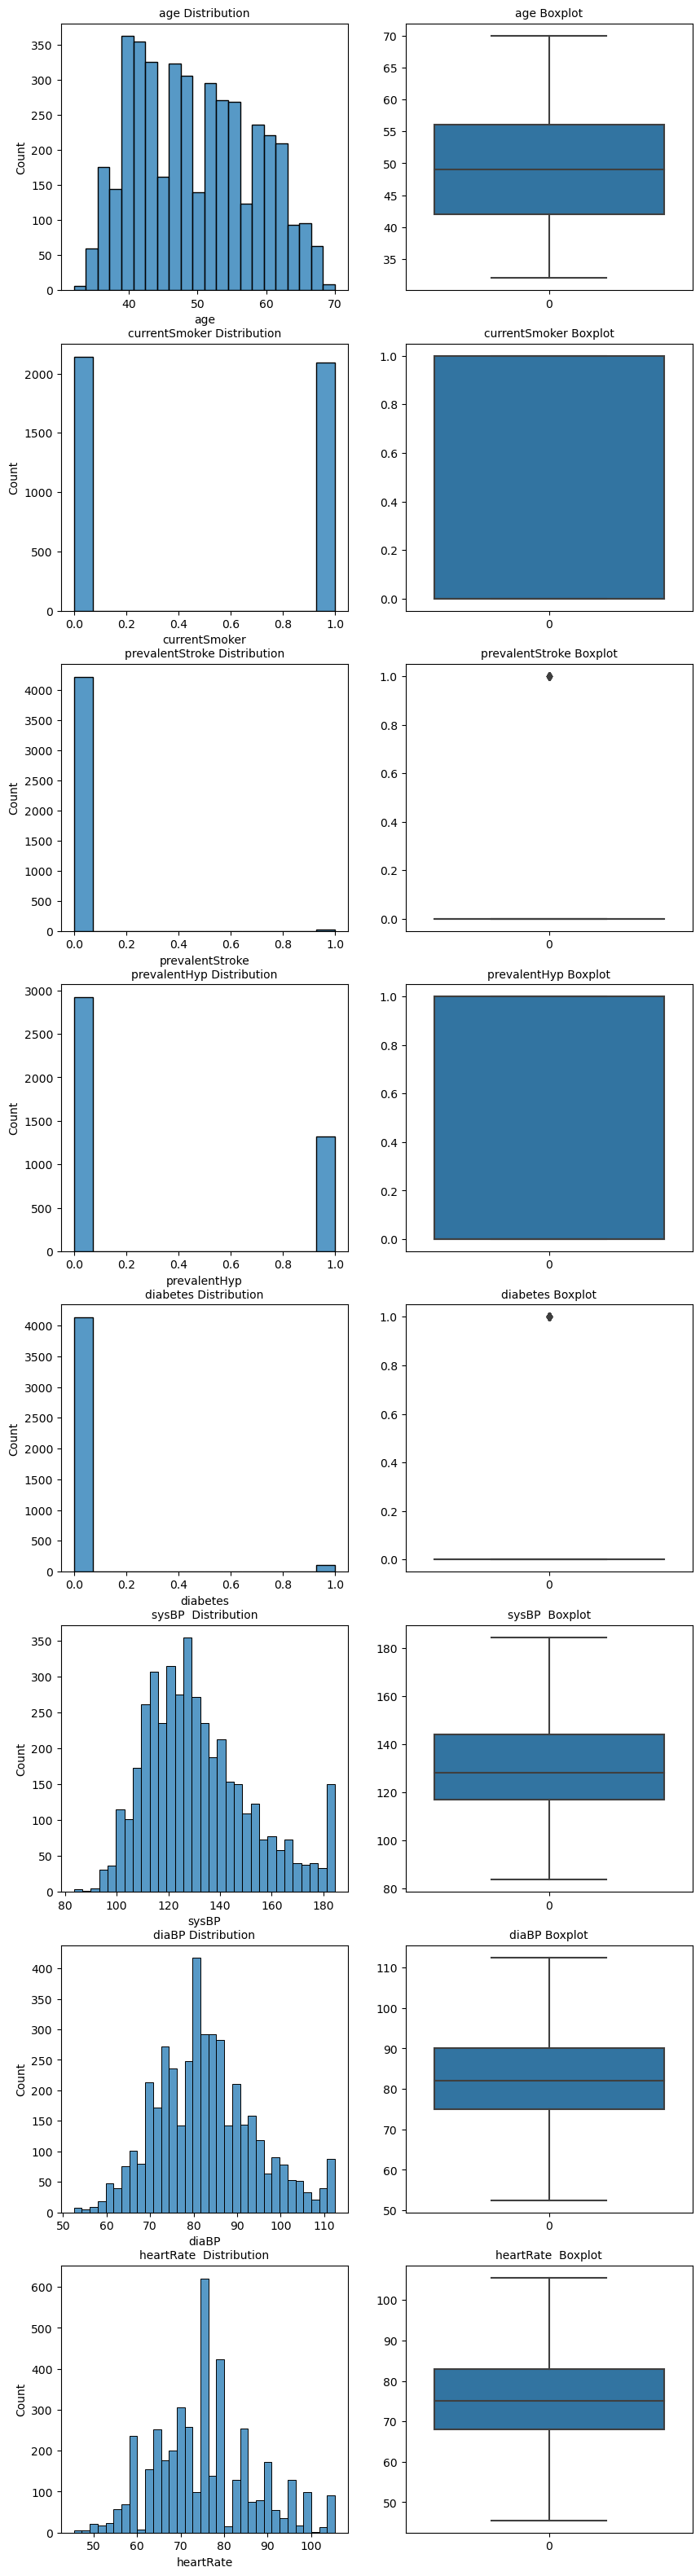

In [100]:
fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(10,40)

a = sns.histplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.histplot(df['currentSmoker'] , ax=axes[1][0])
a.set_title("currentSmoker Distribution",fontsize=10)

a = sns.boxplot(df['currentSmoker'] , orient = "v" , ax=axes[1][1])
a.set_title("currentSmoker Boxplot",fontsize=10)


a = sns.histplot(df['prevalentStroke'] , ax=axes[2][0])
a.set_title("prevalentStroke Distribution",fontsize=10)

a = sns.boxplot(df['prevalentStroke'] , orient = "v" , ax=axes[2][1])
a.set_title("prevalentStroke Boxplot",fontsize=10)


a = sns.histplot(df['prevalentHyp'] , ax=axes[3][0])
a.set_title("prevalentHyp Distribution",fontsize=10)

a = sns.boxplot(df['prevalentHyp'] , orient = "v" , ax=axes[3][1])
a.set_title("prevalentHyp Boxplot",fontsize=10)

a = sns.histplot(df['diabetes'] , ax=axes[4][0])
a.set_title("diabetes Distribution",fontsize=10)

a = sns.boxplot(df['diabetes'] , orient = "v" , ax=axes[4][1])
a.set_title("diabetes Boxplot",fontsize=10)

a = sns.histplot(df['sysBP'] , ax=axes[5][0])
a.set_title("sysBP  Distribution",fontsize=10)

a = sns.boxplot(df['sysBP'] , orient = "v" , ax=axes[5][1])
a.set_title("sysBP  Boxplot",fontsize=10)

a = sns.histplot(df['diaBP'] , ax=axes[6][0])
a.set_title("diaBP Distribution",fontsize=10)

a = sns.boxplot(df['diaBP'] , orient = "v" , ax=axes[6][1])
a.set_title("diaBP Boxplot",fontsize=10)

a = sns.histplot(df['heartRate'] , ax=axes[7][0])
a.set_title("heartRate  Distribution",fontsize=10)

a = sns.boxplot(df['heartRate'] , orient = "v" , ax=axes[7][1])
a.set_title("heartRate  Boxplot",fontsize=10)



plt.show()

In [101]:
#Six columns=["totChol","BMI","glucose","sysBP","diaBP","heartRate"] seems to have outliers.We are going to treat them  through IQR Method. 

In [102]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [103]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [104]:
Outlier=["totChol","BMI","glucose","sysBP","diaBP","heartRate","cigsPerDay"]

In [105]:
for i in Outlier:
    lr,ur=remove_outlier(df[i])
    df[i]=np.where(df[i]> ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])
    

<Axes: >

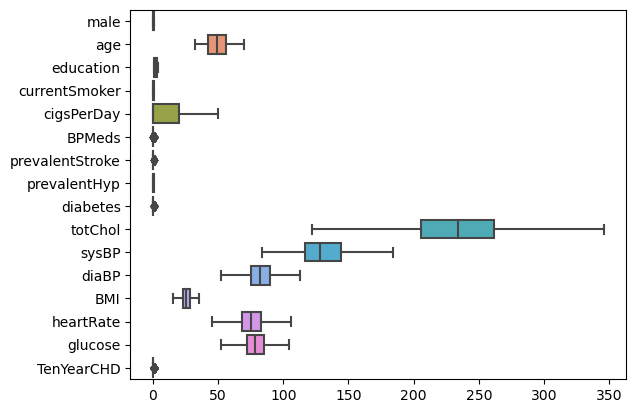

In [106]:
sns.boxplot(data=df,orient='h')

# Split the data into training (70%) and test (30%) with similar proportion of the target variable.

In [107]:
x=df.drop("TenYearCHD",axis=1)
y=df["TenYearCHD"]

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# Check the proportion of the target variable in both train and test data.



In [109]:
y_train.shape

(2968,)

In [110]:
y_test.shape

(1272,)

# Check the information of the training data.

In [111]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 4033 to 235
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             2968 non-null   int64  
 1   age              2968 non-null   int64  
 2   education        2968 non-null   float64
 3   currentSmoker    2968 non-null   int64  
 4   cigsPerDay       2968 non-null   float64
 5   BPMeds           2968 non-null   float64
 6   prevalentStroke  2968 non-null   int64  
 7   prevalentHyp     2968 non-null   int64  
 8   diabetes         2968 non-null   int64  
 9   totChol          2968 non-null   float64
 10  sysBP            2968 non-null   float64
 11  diaBP            2968 non-null   float64
 12  BMI              2968 non-null   float64
 13  heartRate        2968 non-null   float64
 14  glucose          2968 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 371.0 KB


In [112]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 2968 entries, 4033 to 235
Series name: TenYearCHD
Non-Null Count  Dtype
--------------  -----
2968 non-null   int64
dtypes: int64(1)
memory usage: 46.4 KB


# Check the basic measures of descriptive statistics for the training data

In [113]:
x_train.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000,2968.000000
mean,0.421833,49.722372,1.975249,0.493598,9.031049,0.030296,0.004717,0.308962,0.023922,235.997978,131.870620,82.653470,25.680214,75.887803,79.322439
std,0.493935,8.582423,1.011263,0.500043,11.822373,0.170551,0.068530,0.462143,0.152831,42.377260,20.699491,11.397568,3.793646,11.666067,11.338273
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,83.500000,52.500000,15.645000,45.500000,52.500000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.000000,75.000000,23.060000,68.000000,72.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.125000,27.990000,83.000000,85.000000
max,1.000000,70.000000,4.000000,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,346.000000,184.500000,112.500000,35.465000,105.500000,104.500000


In [114]:
x_train.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.023487,0.011005,0.192429,0.300547,-0.058906,0.010896,0.016506,0.018082,-0.086701,-0.007962,0.077402,0.099424,-0.120054,0.016990
age,-0.023487,1.000000,-0.182152,-0.205941,-0.193480,0.131765,0.032026,0.304603,0.104507,0.274685,0.404618,0.214848,0.121021,-0.010006,0.133442
education,0.011005,-0.182152,1.000000,0.023729,0.006713,-0.023611,-0.022632,-0.087778,-0.035511,-0.030464,-0.144494,-0.070672,-0.134438,-0.054800,-0.035976
currentSmoker,0.192429,-0.205941,0.023729,1.000000,0.773869,-0.054971,0.000881,-0.095719,-0.017842,-0.030427,-0.116539,-0.116580,-0.175459,0.077875,-0.054030
cigsPerDay,0.300547,-0.193480,0.006713,0.773869,1.000000,-0.052893,-0.011413,-0.062517,-0.012723,-0.014353,-0.079636,-0.061644,-0.099753,0.085326,-0.078833
BPMeds,-0.058906,0.131765,-0.023611,-0.054971,-0.052893,1.000000,0.131954,0.263426,0.023908,0.085121,0.251019,0.191833,0.078826,0.016567,0.004486
prevalentStroke,0.010896,0.032026,-0.022632,0.000881,-0.011413,0.131954,1.000000,0.060389,-0.010777,0.003833,0.053296,0.038772,-0.000710,-0.004818,-0.003043
prevalentHyp,0.016506,0.304603,-0.087778,-0.095719,-0.062517,0.263426,0.060389,1.000000,0.071883,0.161648,0.716814,0.625812,0.283801,0.152372,0.102518
diabetes,0.018082,0.104507,-0.035511,-0.017842,-0.012723,0.023908,-0.010777,0.071883,1.000000,0.034614,0.083334,0.030591,0.054766,0.054436,0.253651
totChol,-0.086701,0.274685,-0.030464,-0.030427,-0.014353,0.085121,0.003833,0.161648,0.034614,1.000000,0.227319,0.192832,0.117543,0.091591,0.035638


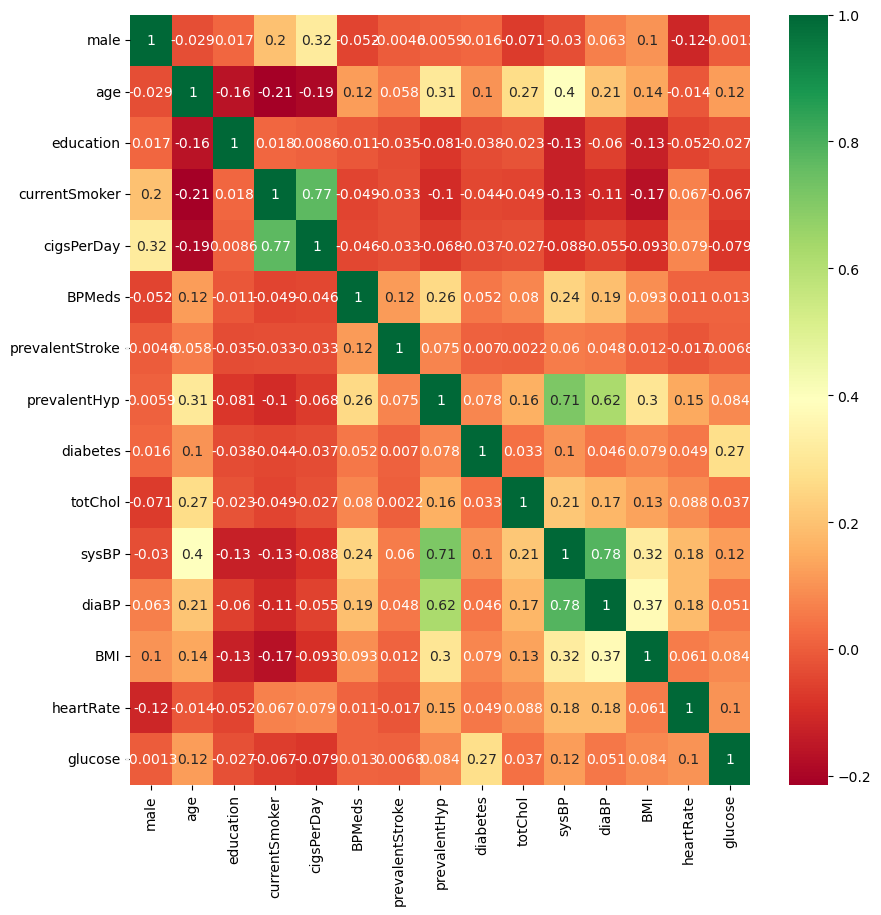

In [115]:
corrmat = x_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Build the Logistic Regression Model using all the variables

In [116]:
lr=LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [117]:
train_predict=lr.predict(x_train)

In [118]:
test_predict=lr.predict(x_test)

In [119]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve

In [120]:
confusion_matrix(y_train,train_predict)

array([[2504,    7],
       [ 432,   25]], dtype=int64)

<Axes: >

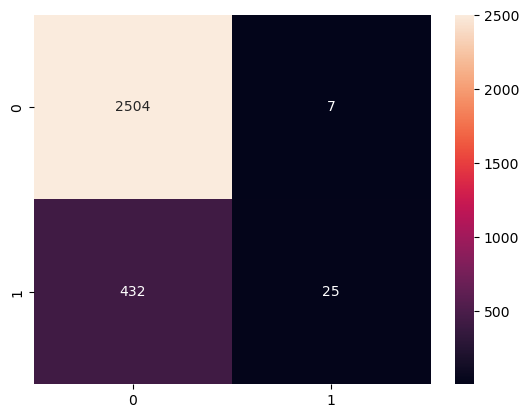

In [121]:
sns.heatmap(confusion_matrix(y_train,train_predict),annot=True,fmt='0.5g')

In [122]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2511
           1       0.78      0.05      0.10       457

    accuracy                           0.85      2968
   macro avg       0.82      0.53      0.51      2968
weighted avg       0.84      0.85      0.79      2968



In [123]:
confusion_matrix(y_test,test_predict)

array([[1082,    3],
       [ 177,   10]], dtype=int64)

<Axes: >

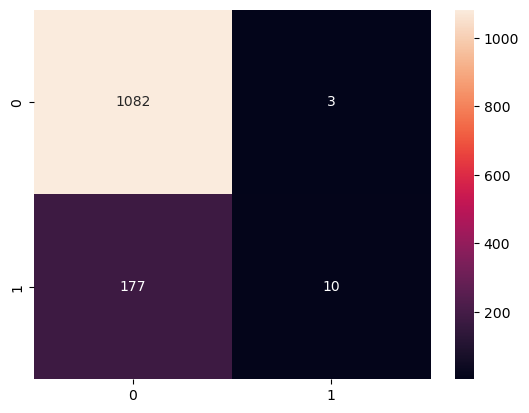

In [124]:
sns.heatmap(confusion_matrix(y_test,test_predict),annot=True,fmt='0.5g')

In [125]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1085
           1       0.77      0.05      0.10       187

    accuracy                           0.86      1272
   macro avg       0.81      0.53      0.51      1272
weighted avg       0.85      0.86      0.80      1272



AUC: 0.526


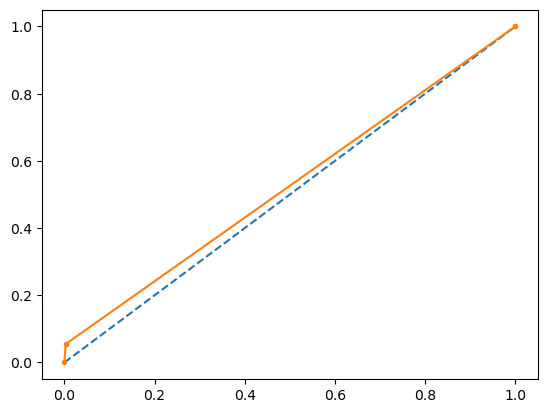

In [126]:
# AUC and ROC for the training data
# calculating on the basis of a person not defaulting
# calculate AUC
auc = roc_auc_score(y_train,train_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.525


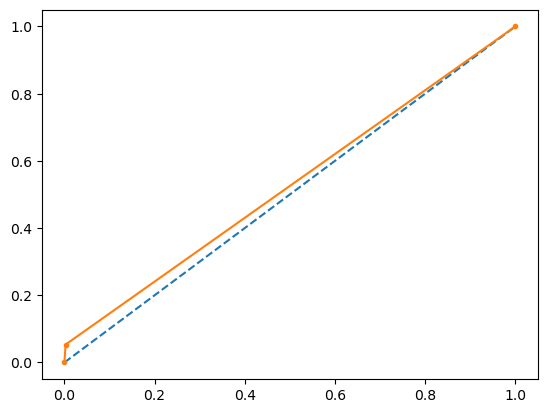

In [49]:
# AUC and ROC for the testing data
# calculating on the basis of a person not defaulting
# calculate AUC
auc = roc_auc_score(y_test,test_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Feature Selection

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
bestfeatures=SelectKBest(score_func=chi2,k=10)
fit=bestfeatures.fit(x,y)

In [52]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)

In [53]:
df1=pd.concat([df_columns,df_scores],axis=1)
df1.columns=["specs","score"]

In [54]:
print(df1.nlargest(10,'score'))

           specs       score
10         sysBP  601.704184
1            age  319.266019
4     cigsPerDay  221.458705
9        totChol  201.678325
11         diaBP  131.465312
7   prevalentHyp   92.048736
8       diabetes   39.144944
5         BPMeds   30.615014
14       glucose   27.298443
0           male   18.899930


In [55]:
x=df[["sysBP","age","cigsPerDay","totChol","diaBP"]]
y=df["TenYearCHD"]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [57]:
lr=LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [58]:
train_predict=lr.predict(x_train)

In [59]:
test_predict=lr.predict(x_test)

In [60]:
confusion_matrix(y_train,train_predict)

array([[2505,    6],
       [ 444,   13]], dtype=int64)

<Axes: >

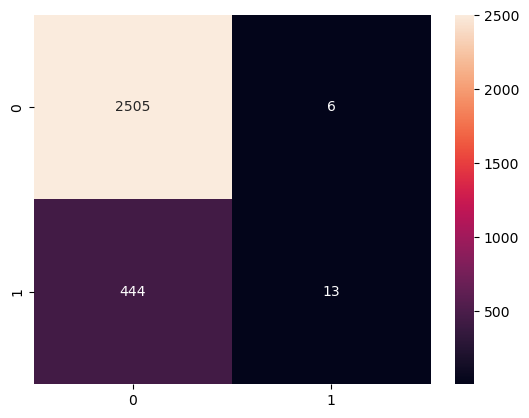

In [61]:
sns.heatmap(confusion_matrix(y_train,train_predict),annot=True,fmt='0.5g')

In [62]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2511
           1       0.68      0.03      0.05       457

    accuracy                           0.85      2968
   macro avg       0.77      0.51      0.49      2968
weighted avg       0.82      0.85      0.78      2968



AUC: 0.513


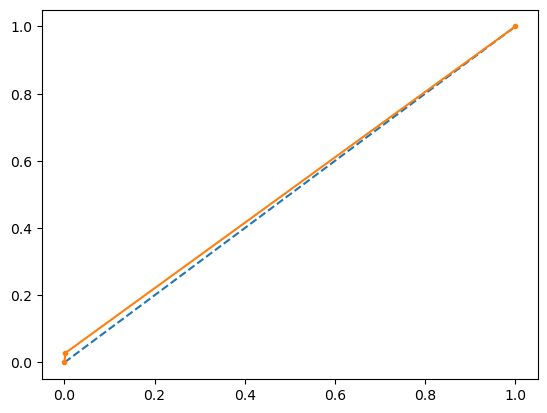

In [63]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = roc_auc_score(y_train,train_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [64]:
confusion_matrix(y_test,test_predict)

array([[1082,    3],
       [ 184,    3]], dtype=int64)

<Axes: >

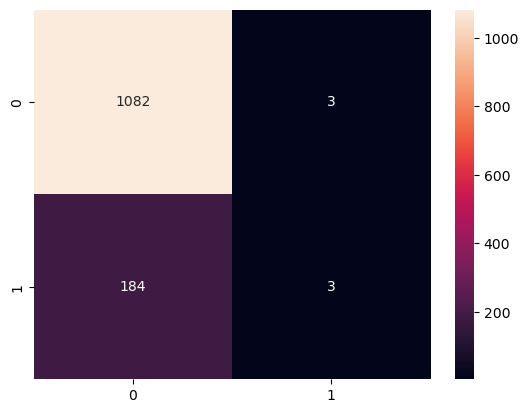

In [65]:
sns.heatmap(confusion_matrix(y_test,test_predict),annot=True,fmt='0.5g')

In [66]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       0.50      0.02      0.03       187

    accuracy                           0.85      1272
   macro avg       0.68      0.51      0.48      1272
weighted avg       0.80      0.85      0.79      1272



AUC: 0.507


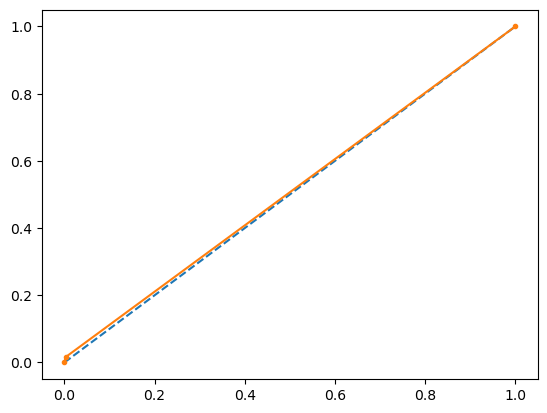

In [67]:
# AUC and ROC for the testing data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = roc_auc_score(y_test,test_predict)
print('AUC: %.3f' % auc)
# # calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# Perform Principal Component Analysis on the data and reduce the predictor variables to a suitable number of dimensions

In [68]:
from sklearn.decomposition import PCA

# NOTE - we are generating only 6 PCA dimensions (dimensionality reduction from 12 to 6)

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(df)
data_reduced.transpose()

array([[-45.55543668,  12.37939544,   7.50865509, ...,  33.23327245,
        -48.94743313, -39.84639916],
       [-21.3789916 , -10.41748768,  -8.16976016, ...,  -1.0393988 ,
         20.61561955,   7.23786976]])

In [69]:
x=data_reduced
y=df["TenYearCHD"]

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [71]:
lr=LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [72]:
train_predict=lr.predict(x_train)

In [73]:
test_predict=lr.predict(x_test)

In [74]:
confusion_matrix(y_train,train_predict)

array([[2511,    0],
       [ 457,    0]], dtype=int64)

<Axes: >

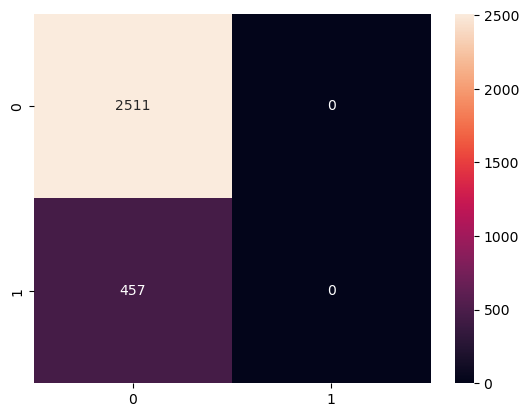

In [75]:
sns.heatmap(confusion_matrix(y_train,train_predict),annot=True,fmt='0.5g')

In [76]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2511
           1       0.00      0.00      0.00       457

    accuracy                           0.85      2968
   macro avg       0.42      0.50      0.46      2968
weighted avg       0.72      0.85      0.78      2968



C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
confusion_matrix(y_test,test_predict)

array([[1085,    0],
       [ 187,    0]], dtype=int64)

In [78]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       0.00      0.00      0.00       187

    accuracy                           0.85      1272
   macro avg       0.43      0.50      0.46      1272
weighted avg       0.73      0.85      0.79      1272



C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SKAN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
pca = PCA(0.95)
data_reduced = pca.fit_transform(df)
data_reduced.shape

(4240, 5)

In [80]:
x=data_reduced
y=df["TenYearCHD"]

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [82]:
lr=LogisticRegression(max_iter=5000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [83]:
train_predict=lr.predict(x_train)

In [84]:
test_predict=lr.predict(x_test)

In [85]:
confusion_matrix(y_train,train_predict)

array([[2508,    3],
       [ 450,    7]], dtype=int64)

In [86]:
print(classification_report(y_train,train_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2511
           1       0.70      0.02      0.03       457

    accuracy                           0.85      2968
   macro avg       0.77      0.51      0.47      2968
weighted avg       0.83      0.85      0.78      2968



In [87]:
confusion_matrix(y_test,test_predict)

array([[1085,    0],
       [ 186,    1]], dtype=int64)

In [88]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1085
           1       1.00      0.01      0.01       187

    accuracy                           0.85      1272
   macro avg       0.93      0.50      0.47      1272
weighted avg       0.88      0.85      0.79      1272

